# Regression: Boston Housing Price Dataset. Predicting a real number

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
print(train_targets) # These are the median house prices in thousand dollars

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

In [6]:
mean = train_data.mean(axis=0)

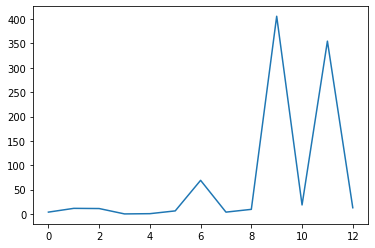

In [7]:
plt.plot(mean)

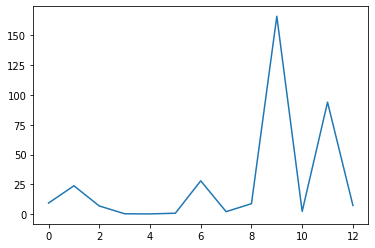

In [8]:
std = train_data.std(axis=0)
plt.plot(std)

Standardize training and test data.

In [9]:
train_data -= mean
train_data /= std

In [10]:
test_data -= mean
test_data /= std

It is important to use on the test data also the mean and std computed on the training data, to prevent any information about the test data leaking into the workflow.

In [11]:
train_data.mean(axis=0)

array([-1.01541438e-16,  1.09923072e-17,  1.74337992e-15, -1.26686340e-16,
       -5.25377321e-15,  6.41414864e-15,  2.98441140e-16,  4.94653823e-16,
        1.12671149e-17, -1.98136337e-16,  2.36686358e-14,  5.95679996e-15,
        6.13920356e-16])

Let's write a function to build the model, in case we need to instantiate it several times.

In [16]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [17]:
val_data = train_data[300:]
val_targets = train_targets[300:]

partial_train_data = train_data[:300]
partial_train_targets = train_targets[:300]

In [18]:
model = build_model()

In [19]:
history = model.fit(partial_train_data, partial_train_targets, epochs=80, batch_size=32, validation_data=(val_data, val_targets))

Train on 300 samples, validate on 104 samples
Epoch 1/80
300/300 [==============================] - 0s 2ms/sample - loss: 514.9888 - mae: 20.9390 - val_loss: 594.1194 - val_mae: 22.3434
Epoch 2/80
300/300 [==============================] - 0s 71us/sample - loss: 450.2511 - mae: 19.3390 - val_loss: 521.5489 - val_mae: 20.7242
Epoch 3/80
300/300 [==============================] - 0s 70us/sample - loss: 383.8898 - mae: 17.6328 - val_loss: 437.3231 - val_mae: 18.7079
Epoch 4/80
300/300 [==============================] - 0s 69us/sample - loss: 311.3035 - mae: 15.5474 - val_loss: 352.0904 - val_mae: 16.4242
Epoch 5/80
300/300 [==============================] - 0s 71us/sample - loss: 238.9504 - mae: 13.2796 - val_loss: 268.9749 - val_mae: 13.8192
Epoch 6/80
300/300 [==============================] - 0s 76us/sample - loss: 171.7004 - mae: 10.8908 - val_loss: 194.9610 - val_mae: 11.0843
Epoch 7/80
300/300 [==============================] - 0s 78us/sample - loss: 117.2540 - mae: 8.6429 - val_los

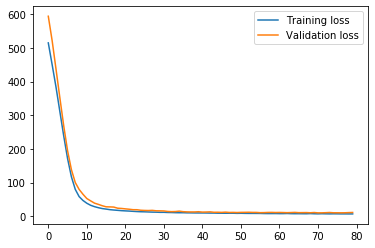

In [20]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

plt.plot(loss_values, label='Training loss')
plt.plot(val_loss_values, label='Validation loss')
plt.legend()

In [21]:
mse, mae = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 103us/sample - loss: 20.3707 - mae: 2.9687


In [22]:
mse

20.370676078048408

In [23]:
mae

2.9686842